In [57]:
import pandas as pd 
import numpy as np
import requests
# from config import omdb_api
from pprint import pprint
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
books = pd.read_csv("../../br.csv/br.csv", encoding="utf-8", engine="python", error_bad_lines=False)

Skipping line 312075: unexpected end of data


In [3]:
more_reviews = books.drop(books[books.ratingsCount < 100000].index)

In [4]:
more_reviews['title'].nunique()

3413

In [5]:
sample = more_reviews.iloc[0:2000]
sample = sample.reset_index()
book_rating = sample[['rating']]


In [6]:
books = []

for index, row in sample.iterrows():
    title = row['title']
    books.append(title)
    

In [7]:
base_url = "http://www.omdbapi.com/?" 

query_url = f"{base_url}apikey=trilogy&t={books[0]}"

response = requests.get(query_url)

pprint(response.json())

{'Actors': 'Richard Harris, Maggie Smith, Robbie Coltrane, Saunders Triplets',
 'Awards': 'Nominated for 3 Oscars. Another 17 wins & 62 nominations.',
 'BoxOffice': '$317,557,891',
 'Country': 'UK, USA',
 'DVD': '28 May 2002',
 'Director': 'Chris Columbus',
 'Genre': 'Adventure, Family, Fantasy',
 'Language': 'English',
 'Metascore': '64',
 'Plot': 'An orphaned boy enrolled in a school of wizardry, where he learns '
         'the truth about himself, his family and the terrible evil that '
         'haunts the magical world.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BNjQ3NWNlNmQtMTE5ZS00MDdmLTlkZjUtZTBlM2UxMGFiMTU3XkEyXkFqcGdeQXVyNjUwNzk3NDc@._V1_SX300.jpg',
 'Production': 'Warner Bros. Pictures',
 'Rated': 'PG',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.6/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '80%'},
             {'Source': 'Metacritic', 'Value': '64/100'}],
 'Released': '16 Nov 2001',
 'Response': 'True',
 'Runtime': '152 min',
 'Ti

In [8]:
json_list = []

for book in books:
    try:
        query_url= base_url + "apikey=" + "trilogy" + "&t=" + book
        response = requests.get(query_url)
        data = response.json()
        json_list.append(data)
        
    except:
        print("...")

In [9]:
# pprint(json_list)

In [10]:
df = pd.DataFrame(json_list)
df['Book Rating'] = book_rating
df

,Actors,Awards,BoxOffice,Country,DVD,Director,Error,Genre,Language,Metascore,...,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes,totalSeasons,Book Rating
0,"Richard Harris, Maggie Smith, Robbie Coltrane,...",Nominated for 3 Oscars. Another 17 wins & 62 n...,"$317,557,891","UK, USA",28 May 2002,Chris Columbus,NaN,"Adventure, Family, Fantasy",English,64,...,Harry Potter and the Sorcerer's Stone,movie,http://movies.warnerbros.com/awards/harry.html,"J.K. Rowling (novel), Steve Kloves (screenplay)",2001,tt0241527,7.6,"538,048",NaN,4.440
1,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.540
2,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.470
3,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.380
4,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.530
5,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.530
6,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.750
7,"Michaela Badinková, Jerzy Michal Bozyk, Igor C...",4 wins & 8 nominations.,N/A,"Czech Republic, Poland, France",N/A,Petr Zelenka,NaN,Drama,"Czech, Polish, English",N/A,...,The Karamazov Brothers,movie,http://www.braciakaramazow.pl/,"Fyodor Dostoevsky (novel), Evald Schorm (stage...",2008,tt1080716,7.8,989,NaN,4.310
8,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.910
9,"Keir Dullea, Gary Lockwood, William Sylvester,...",Won 1 Oscar. Another 13 wins & 10 nominations.,"$135,620","UK, USA",25 Aug 1998,Stanley Kubrick,NaN,"Adventure, Sci-Fi","English, Russian",82,...,2001: A Space Odyssey,movie,N/A,"Stanley Kubrick (screenplay), Arthur C. Clarke...",1968,tt0062622,8.3,"516,610",NaN,3.730


In [92]:
df.to_csv('high_reviews.csv')

In [11]:
df.columns

Index(['Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director', 'Error',
       'Genre', 'Language', 'Metascore', 'Plot', 'Poster', 'Production',
       'Rated', 'Ratings', 'Released', 'Response', 'Runtime', 'Title', 'Type',
       'Website', 'Writer', 'Year', 'imdbID', 'imdbRating', 'imdbVotes',
       'totalSeasons', 'Book Rating'],
      dtype='object')

In [12]:
rated= df[['Title','Rated','Book Rating', 'imdbRating']]
rated['Book Rating'] = rated['Book Rating']*2

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
rated = rated.replace('N/A', np.nan)
rated = rated.dropna()


In [14]:
rated['imdbRating'] = rated['imdbRating'].astype(float)

In [15]:
rated = rated.reset_index()

In [16]:
rated = rated.drop(columns=['index'])

In [27]:
grouped_count = rated.groupby('Rated').count()
count = grouped_count['Title']

In [48]:
final_df = rated.groupby('Rated').mean()

In [53]:
final_df['Count'] = count
final_df = final_df.rename(columns={'imdbRating':'Average Rating'})

In [54]:
final_df = final_df[['Average Rating', 'Count']]

In [55]:
final_df.to_csv('output/sorted_by_rated.csv')

In [56]:
final_df

,Average Rating,Count
Rated,,
APPROVED,6.969,45
G,7.025,40
NC-17,6.500,3
NOT RATED,7.215,117
PASSED,7.250,12
PG,6.974,140
PG-13,6.942,215
R,6.886,288
TV-14,7.500,7


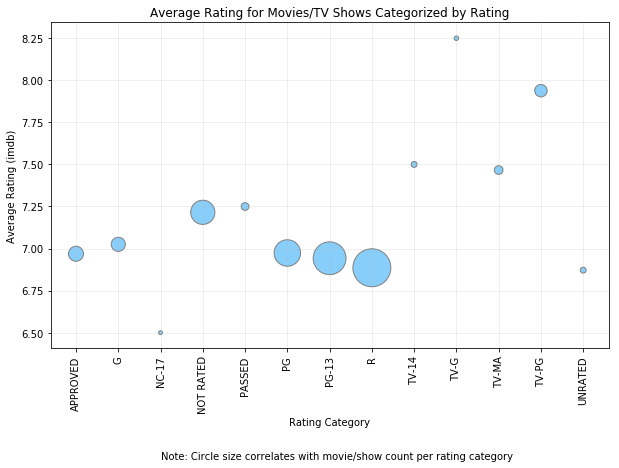

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(final_df.index, final_df['Average Rating'], final_df['Count']*5, color='lightskyblue', edgecolor='grey')
plt.xticks(rotation=90)
plt.title('Average Rating for Movies/TV Shows Categorized by Rating')
plt.xlabel('Rating Category')
plt.ylabel('Average Rating (imdb)')
plt.grid(alpha=0.25)
plt.text(2,5.75,'Note: Circle size correlates with movie/show count per rating category')
plt.savefig("images/rated_scatter.png", bbox_inches='tight')